<a href="https://colab.research.google.com/github/ejrtks1020/Deep_learning_library/blob/main/_2_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C%EC%9A%B0_%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로우 회귀 분석 모델

- 다양한 방법이 존재
- 텐서플로우2만 사용하는 방법, 케라스를 이용한 방법, 둘을 모두 섞은 방법 등등  


## 선형 회귀(Linear Regression)

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [ ]:
learning_rate = 0.01
training_steps = 1000

In [ ]:
X = np.random.randn(50)
Y = 2 * X + np.random.randn(50)

In [ ]:
W = tf.Variable(np.random.randn(), name = 'weight')
b = tf.Variable(np.random.randn(), name = 'bias')

def linear_regression(x):
  return W * x + b

def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization():
  with tf.GradientTape() as tape:
    pred = linear_regression(X)
    loss = mean_square(pred ,Y)

  gradients = tape.gradient(loss, [W, b]) # 기울기(gradients) 값을 가져온다
  optimizer.apply_gradients(zip(gradients, [W, b])) # 가져운 기울기 값과 업데이트 해야될 weight와 bias값을 같이 할당


In [ ]:
for step in range(1 ,training_steps + 1):
  run_optimization()

  if step % 50 == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print('step: {:4d}\tloss: {:4f}\tW: {:.4f}\tb: {:.4f}'.format(step, loss, W.numpy(), b.numpy()))

step:   50	loss: 2.028017	W: 1.2665	b: 0.9718
step:  100	loss: 0.896018	W: 1.7719	b: 0.4521
step:  150	loss: 0.739610	W: 1.9254	b: 0.2291
step:  200	loss: 0.716214	W: 1.9759	b: 0.1372
step:  250	loss: 0.712619	W: 1.9937	b: 0.1001
step:  300	loss: 0.712062	W: 2.0002	b: 0.0852
step:  350	loss: 0.711976	W: 2.0027	b: 0.0793
step:  400	loss: 0.711962	W: 2.0037	b: 0.0770
step:  450	loss: 0.711960	W: 2.0040	b: 0.0761
step:  500	loss: 0.711960	W: 2.0042	b: 0.0757
step:  550	loss: 0.711960	W: 2.0042	b: 0.0756
step:  600	loss: 0.711960	W: 2.0043	b: 0.0755
step:  650	loss: 0.711960	W: 2.0043	b: 0.0755
step:  700	loss: 0.711960	W: 2.0043	b: 0.0755
step:  750	loss: 0.711960	W: 2.0043	b: 0.0755
step:  800	loss: 0.711960	W: 2.0043	b: 0.0755
step:  850	loss: 0.711960	W: 2.0043	b: 0.0755
step:  900	loss: 0.711960	W: 2.0043	b: 0.0755
step:  950	loss: 0.711960	W: 2.0043	b: 0.0755
step: 1000	loss: 0.711960	W: 2.0043	b: 0.0755


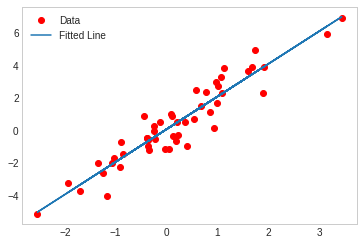

In [ ]:
plt.plot(X, Y, 'ro', label = 'Data')
plt.plot(X , np.array(W * X + b), label = 'Fitted Line')
plt.legend()
plt.grid()
plt.show()

## 다항 회귀 (Nonlinear Regression)


### modules import

In [ ]:
from tensorflow.keras.optimizers import Adam

### Hyper Parameters

In [ ]:
epochs = 1000
learning_rate = 0.04

### 변수 지정

In [ ]:
a = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())
c = tf.Variable(np.random.randn())

In [ ]:
print(a) #그냥 출력하면 객체정보만 나오므로 넘파이로 변환해서 출력해야한다.

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.58313453>


In [ ]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

-1.7935073
0.52825105
-2.0557625


### 데이터 지정

In [ ]:
X = np.random.randn(50)
Y = X **2 + X * np.random.randn(50)    # 실제 a = 2, b = 1, c = 0에 가깝게 가중치 abc가 최적화 되어야한다.

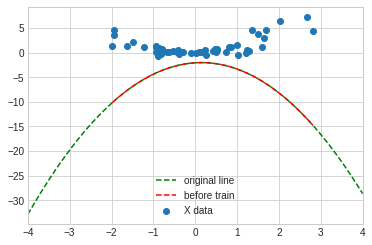

In [ ]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x ** 2 + b* line_x + c

x_ = np.arange(-4.0, 4.0, 0.001)
y_ = a*x_ **2 + b * x_ + c

plt.scatter(X, Y, label = 'X data')
plt.plot(x_, y_, 'g--', label = 'original line')
plt.plot(line_x, line_y, 'r--', label = 'before train')
plt.xlim(-4.0, 4.0)
plt.legend()

plt.show()

### Util Functions

In [ ]:
def compute_loss():
  pred_y = a *(np.array(X)**2) + b*np.array(X) + c
  loss = tf.reduce_mean((Y - pred_y)**2)
  return loss

### Optimizer

In [ ]:
optimizer = Adam(learning_rate = learning_rate)

### 학습

In [ ]:
for epoch in range(1, epochs + 1, 1):
  optimizer.minimize(compute_loss, var_list = [a,b,c]) # loss 값을 최소화하는 방향으로 a, b, c를 최적화

  if epoch % 100 == 0:
    print('epoch: {:4d}\ta: {:.4f}\tb: {:.4f}\tc: {:.4f}'.format(epoch, a.numpy(), b.numpy(), c.numpy()))

epoch:  100	a: 0.6018	b: 0.3416	c: 0.3004
epoch:  200	a: 0.7703	b: 0.2227	c: 0.2217
epoch:  300	a: 0.8072	b: 0.2057	c: 0.1338
epoch:  400	a: 0.8189	b: 0.2003	c: 0.1062
epoch:  500	a: 0.8215	b: 0.1991	c: 0.1001
epoch:  600	a: 0.8219	b: 0.1989	c: 0.0992
epoch:  700	a: 0.8219	b: 0.1989	c: 0.0991
epoch:  800	a: 0.8219	b: 0.1989	c: 0.0991
epoch:  900	a: 0.8219	b: 0.1989	c: 0.0991
epoch: 1000	a: 0.8219	b: 0.1989	c: 0.0991


### 학습 후의 회귀선

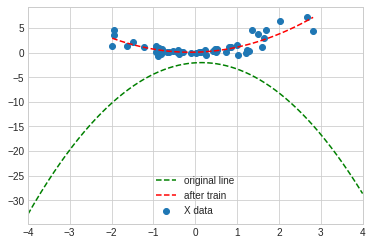

In [ ]:
line_x = np.arange(min(X), max(X), 0.001)
line_y = a * line_x ** 2 + b* line_x + c


plt.scatter(X, Y, label = 'X data')
plt.plot(x_, y_, 'g--', label = 'original line')
plt.plot(line_x, line_y, 'r--', label = 'after train')
plt.xlim(-4.0, 4.0)
plt.legend()

plt.show()

## 로지스틱 회귀(Logistic Regression)
- 다항 분류, MNIST

### modules import

In [ ]:
from tensorflow.keras.datasets import mnist

### 하이퍼 파라미터 (Hyper Parameter)


In [ ]:
num_classes = 10
num_features = 784

learning_rate = 0.1
training_steps = 1000
batch_size = 256

### 데이터 로드

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape(-1, num_features), x_test.reshape(-1, num_features) # 28 x 28을 1차원으로 펼침

x_train, x_test = x_train / 255., x_test /255. #이미지값은 0~ 255의 값을 가지기때문에 0과 1사이 값으로 normalization

In [ ]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

### tf.data API 사용
- 03 에서 다시 다룸 

In [ ]:
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data=  train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1) #데이터 API를 이용해 셔플과 배치를 구성함

### 변수 지정

In [ ]:
W = tf.Variable(tf.random.normal([num_features, num_classes]), 'weight')
b = tf.Variable(tf.zeros([num_classes]), name = 'bias')

### Util Functions

In [ ]:
def logistic_regression(x):
  return tf.nn.softmax(tf.matmul(x, W) + b)

def cross_entropy(pred_y, true_y):   #대표적 loss function
  true_y = tf.one_hot(true_y ,depth = num_classes)
  pred_y = tf.clip_by_value(pred_y, 1e-9, 1.) # 출력값의 범위를 정한다, 0이들어가면 안되므로 최솟값은 아주작은 값으로 지정

  return tf.reduce_mean(-tf.reduce_sum(true_y * tf.math.log(pred_y), 1))

def accuracy(y_pred, y_true):
  correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
  return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Optimizer

In [ ]:
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
def run_optimization(x, y):
  with tf.GradientTape() as tape:
    pred = logistic_regression(x)
    loss =cross_entropy(pred, y)

  gradients = tape.gradient(loss, [W,b])
  optimizer.apply_gradients(zip(gradients, [W, b])) # w,b를 zip으로 묶어서 gradients에따라서 W, b가 업데이트 될수있도록 함

  


### 학습 진행

In [ ]:
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
  run_optimization(batch_x, batch_y)

  if step % 50 == 0:
    pred = logistic_regression(batch_x)
    loss = cross_entropy(pred, batch_y)
    acc = accuracy(pred, batch_y)
    print('step: {:4d}\tloss: {:.4f}\taccuracy: {:4f}'.format(step, loss, acc))

step:   50	loss: 6.4168	accuracy: 0.304688
step:  100	loss: 4.5206	accuracy: 0.406250
step:  150	loss: 3.1259	accuracy: 0.535156
step:  200	loss: 1.9861	accuracy: 0.617188
step:  250	loss: 1.6579	accuracy: 0.660156
step:  300	loss: 1.9000	accuracy: 0.660156
step:  350	loss: 1.9503	accuracy: 0.703125
step:  400	loss: 1.4305	accuracy: 0.707031
step:  450	loss: 0.9008	accuracy: 0.781250
step:  500	loss: 1.3282	accuracy: 0.777344
step:  550	loss: 1.3111	accuracy: 0.753906
step:  600	loss: 1.0450	accuracy: 0.792969
step:  650	loss: 1.1720	accuracy: 0.765625
step:  700	loss: 1.1702	accuracy: 0.792969
step:  750	loss: 1.5777	accuracy: 0.687500
step:  800	loss: 1.1907	accuracy: 0.808594
step:  850	loss: 1.1530	accuracy: 0.753906
step:  900	loss: 1.0101	accuracy: 0.792969
step:  950	loss: 0.9179	accuracy: 0.785156
step: 1000	loss: 1.0487	accuracy: 0.804688


###  테스트

In [ ]:
pred = logistic_regression(x_test)
print('Test Accuracy: {}'.format(accuracy(pred, y_test)))

Test Accuracy: 0.8176000118255615


### 시각화

(5, 10)


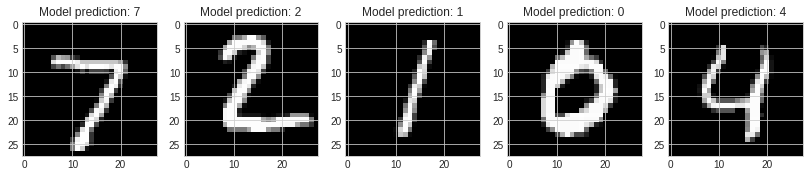

In [ ]:
num_images = 5
test_images = x_test[:num_images]
predictions = logistic_regression(test_images)
print(predictions.shape)
plt.figure(figsize = (14, 8))

for i in range(1, num_images + 1, 1):
  plt.subplot(1, num_images, i)
  plt.imshow(np.reshape(test_images[i-1], [28, 28]), cmap = 'gray') # 784를 다시 28 x 28형태로 변환
  plt.title('Model prediction: {}'.format(np.argmax(predictions.numpy()[i-1])))

plt.show()